In [1]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
params = {'text.usetex' : True,
        'font.family' : 'lmodern'}
plt.rcParams.update(params)
import re

In [100]:
neutron_file = h5.File('od_data/OD02222347.hdf5')
data = neutron_file['data']
meta = neutron_file['meta']
data.keys()

<KeysViewHDF5 ['muon_direction', 'muon_energy', 'muon_impact', 'muon_initial', 'muon_pn', 'neutron_direction', 'neutron_energy', 'neutron_generation', 'neutron_xyz']>

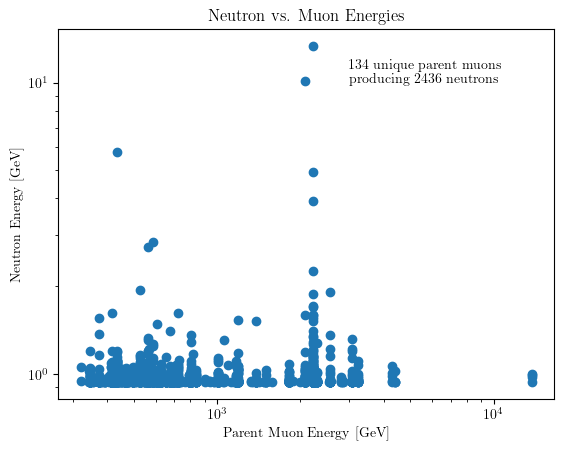

In [101]:
def plot_e_vs_e(h5_file):
    ''' A simple scatter plot of muon vs neutron energies'''

    data = h5_file['data']
    meta = h5_file['meta']

    muon_energies = data['muon_energy']
    neutron_energies = data['neutron_energy']
    parents = meta['muon_parents'][0]

    plt.scatter(muon_energies, neutron_energies)
    plt.xscale('log'); plt.yscale('log')
    plt.title('Neutron vs. Muon Energies')
    plt.xlabel('Parent Muon Energy [GeV]')
    plt.ylabel('Neutron Energy [GeV]')
    sum_string = str(parents) + ' unique parent muons\nproducing ' + str(len(neutron_energies)) +  ' neutrons'
    plt.text(3000,10, sum_string)

plot_e_vs_e(neutron_file)

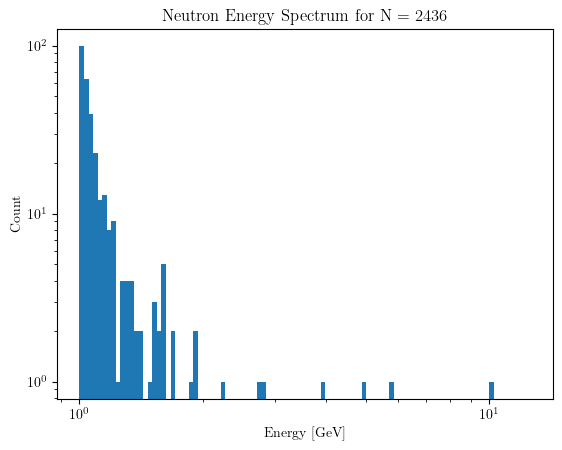

In [102]:
def plot_neutron_energy_histogram(h5_file, bins = 200):
    ''' A simple histogram of the neutron energies from the file'''

    data = h5_file['data']
    neutron_energies = data['neutron_energy']
    logbins = np.logspace(0, 1.1, bins)
    plt.hist(neutron_energies, bins = logbins)
    plt.yscale('log'); plt.xscale('log')
    plt.title('Neutron Energy Spectrum for N = ' + str(len(neutron_energies)))
    plt.xlabel('Energy [GeV]'); plt.ylabel('Count')

plot_neutron_energy_histogram(neutron_file, 100)

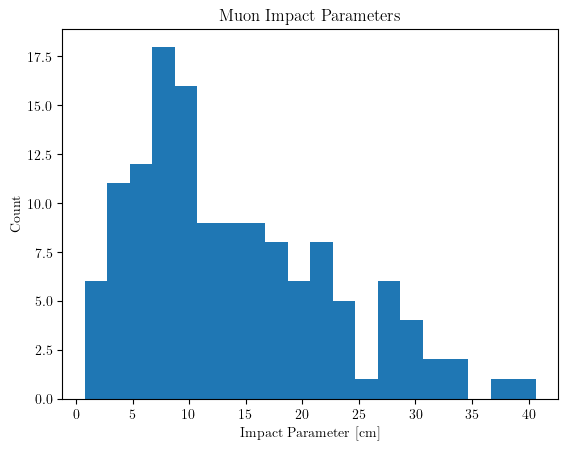

In [103]:
def plot_impact_hist(h5_file, bins = 20):

    plt.hist(np.unique(data['muon_impact']), bins=bins)
    plt.title('Muon Impact Parameters')
    plt.xlabel('Impact Parameter [cm]'); plt.ylabel('Count')

plot_impact_hist(neutron_file)

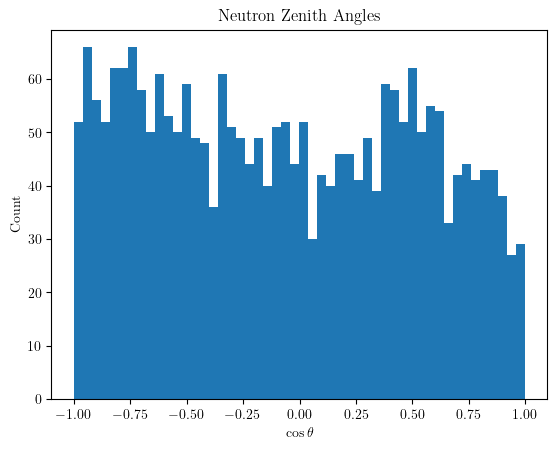

In [104]:
def plot_coz_neutrons(h5_file, bins=50):
    plt.hist(data['neutron_direction'][:,2], bins=bins)
    plt.title('Neutron Zenith Angles')
    plt.xlabel(r'$\cos \theta$'); plt.ylabel('Count')

plot_coz_neutrons(neutron_file)

In [97]:
np.array(data['neutron_direction'])[:,2]

array([-0.32105771,  0.87286182,  0.36746998])